

---



<h4>Value at risk (VaR)</h4>
<p>Estimating the risk of a portfolio is very important to long-term capital growth. There are a lot of techniques to help manage risk, but here we'll be covering 'value at risk' (VaR).</p>
<p>There are two main ways to calculate VaR:</p>
<ol>
<li>Using Monte Carlo simulation</li>
<li>Using the <a href="https://www.investopedia.com/ask/answers/041715/what-variancecovariance-matrix-or-parametric-method-value-risk-var.asp" target="_blank">variance-covariance method</a></li>
</ol>
<p>In this post, we'll focus on using method 2 (variance-covariance).</p>
<p>VaR provides an estimate of the maximum loss from a given portfolio over a period of time. You can calculate VaR at various confidence levels.</p>
<p>For example, given a VaR of 250,000 at 95% confidence, there is a 95% chance that your portfolio will lose no more than 250,000 the following day.</p>
<p>Note that the standard VaR calculation assumes the following:</p>
<ul>
<li><b>Normal distribution of returns</b> - VaR assumes the returns of the  portfolio are normally distributed. This is of course not realistic for most assets, but allows us to develop a baseline using a much more simplistic calculation. <i>(Modifications can be made to VaR to account for different distributions, but here we'll focus on the standard VaR calculation)</i></p>
<li><b>Standard market conditions</b> - Like many financial instruments, VaR is best used for considering loss in standard markets, and is not well-suited for extreme/outlier events.</li>
</ul>
</p>

<h4>Steps to calculate the VaR of a portfolio</h4>
<p>In order to calculate the VaR of your portfolio, you can follow the steps below:</p>
<ol>
  <li>Calculate periodic returns of the stocks in your portfolio</li>
  <li>Create a covariance matrix based on the returns</li>
  <li>Calculate the portfolio mean and standard deviation
  <br><i>(weighted based on investment levels of each stock in portolio)</i></li>
  <li>Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean</li>
   <li>Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4</li>
  </ol>
  

<h4>1) Calculate periodic returns of the stocks in your portfolio </h4>

In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


one_yr_ago = datetime.now() - relativedelta(years=1)
one_yr_ago = one_yr_ago.strftime("%Y-%m-%d")

start = one_yr_ago
start = one_yr_ago 
end = '2023-07-31'
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']
all_df = yf.download(symbols, start, end)['Adj Close']

#From the closing prices, calculate periodic returns
returns = all_df.pct_change()

[*********************100%***********************]  6 of 6 completed


In [6]:
returns.tail()

,FDS,HIG,INVH,RBLX,ROL,SNOW
Date,,,,,,
2023-07-24,0.011113,0.009169,0.000553,-0.025142,0.005166,-0.006254
2023-07-25,0.005724,-0.004409,-0.016869,0.002781,0.001788,0.025686
2023-07-26,0.002687,0.015434,-0.000844,0.007312,-0.000669,-0.051815
2023-07-27,-0.011307,0.005419,-0.017737,-0.051064,-0.088839,-0.010176
2023-07-28,0.002457,-0.050348,0.016624,0.026906,-0.004655,0.038985


<h4>2) Create a covariance matrix based on the returns </h4>


In [7]:
#Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix


,FDS,HIG,INVH,RBLX,ROL,SNOW
FDS,0.000270,0.000112,0.000141,0.000239,0.000090,0.000232
HIG,0.000112,0.000240,0.000089,0.000131,0.000065,0.000072
INVH,0.000141,0.000089,0.000314,0.000259,0.000085,0.000256
RBLX,0.000239,0.000131,0.000259,0.002137,0.000166,0.000970
ROL,0.000090,0.000065,0.000085,0.000166,0.000247,0.000083
SNOW,0.000232,0.000072,0.000256,0.000970,0.000083,0.001879


<h4>3) Calculate the portfolio mean and standard deviation</h4>

In [11]:
initial_investment= 1000000
#Calculate mean returns for each stock
avg_rets = returns.mean()

#Calculate mean returns for portfolio overall,
#using mean, using dot product formula to
#normalize against investment weights
weights = np.array([3.44608226e-01, 6.12683089e-02, 8.42134112e-02, 2.97174507e-08,
       3.81387918e-01, 1.28522106e-01])
port_mean = avg_rets.dot(weights)

#Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

#Calculate mean of given investment
mean_investment = (1+port_mean) * initial_investment

#Calculate standard deviation of given investmnet
stdev_investment = initial_investment * port_stdev

<h4>4) Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean</h4>

In [12]:
#Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

#Using SciPy ppf method to generate values for the
#inverse cumulative distribution function to a normal distribution
#Plugging in the mean, standard deviation of our portfolio
#as calculated above
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


<h4>5) Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4</h4>

In [13]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

21816.626361689414

<p>Here we are saying with 95% confidence that the loss of our portfolio will not exceed ~$22.3k over a one day period.</p>
<h4>Value at risk over n-day time period</h4>
<p>What if we wanted to calculate this over a larger window of time? Below we can easily do that by just taking our 1 day VaR and multiplying it by the <a href="https://www.investopedia.com/articles/04/101304.asp" target="_blank">square root of the time period</a>.</p>

1 VaR (95% confidence): 21816.63
2 VaR (95% confidence): 30853.37
3 VaR (95% confidence): 37787.51
4 VaR (95% confidence): 43633.25
5 VaR (95% confidence): 48783.46
6 VaR (95% confidence): 53439.6
7 VaR (95% confidence): 57721.37
8 VaR (95% confidence): 61706.74
9 VaR (95% confidence): 65449.88
10 VaR (95% confidence): 68990.23
11 VaR (95% confidence): 72357.56
12 VaR (95% confidence): 75575.01
13 VaR (95% confidence): 78660.97
14 VaR (95% confidence): 81630.34
15 VaR (95% confidence): 84495.43
16 VaR (95% confidence): 87266.51
17 VaR (95% confidence): 89952.25
18 VaR (95% confidence): 92560.11
19 VaR (95% confidence): 95096.47
20 VaR (95% confidence): 97566.92
21 VaR (95% confidence): 99976.34
22 VaR (95% confidence): 102329.05
23 VaR (95% confidence): 104628.86
24 VaR (95% confidence): 106879.2
25 VaR (95% confidence): 109083.13
26 VaR (95% confidence): 111243.4
27 VaR (95% confidence): 113362.52
28 VaR (95% confidence): 115442.74
29 VaR (95% confidence): 117486.13
30 VaR (95% confid

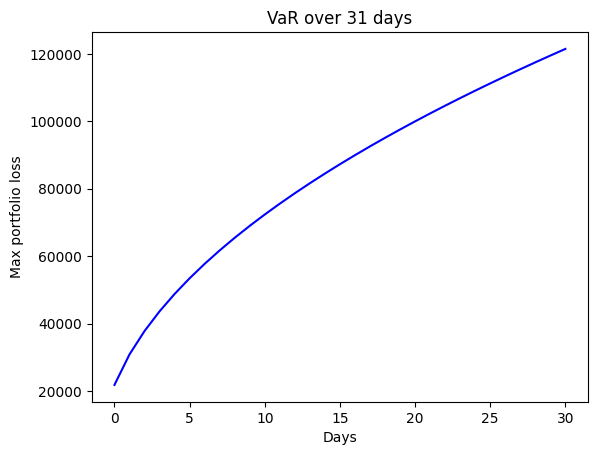

In [24]:
# Calculate n Day VaR
var_array = []
num_days = 31 #len(returns)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " VaR (95% confidence): " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Days")
plt.ylabel("Max portfolio loss")
plt.title("VaR over "+str(num_days) +" days")
plt.plot(var_array, "b")


In [30]:
VaR_df = pd.DataFrame({"Day":[i for i in range(len(var_array))],"VaR" : var_array})

In [33]:
VaR_df.head(len(var_array)//4)

,Day,VaR
0,0,21816.63
1,1,30853.37
2,2,37787.51
3,3,43633.25
4,4,48783.46
5,5,53439.60
6,6,57721.37


In [34]:
VaR_df[6:12]

,Day,VaR
6,6,57721.37
7,7,61706.74
8,8,65449.88
9,9,68990.23
10,10,72357.56
11,11,75575.01


In [35]:
VaR_df[12:18]

,Day,VaR
12,12,78660.97
13,13,81630.34
14,14,84495.43
15,15,87266.51
16,16,89952.25
17,17,92560.11


In [37]:
VaR_df[18:26]

,Day,VaR
18,18,95096.47
19,19,97566.92
20,20,99976.34
21,21,102329.05
22,22,104628.86
23,23,106879.20
24,24,109083.13
25,25,111243.40


In [38]:
VaR_df[26:31]

,Day,VaR
26,26,113362.52
27,27,115442.74
28,28,117486.13
29,29,119494.58
30,30,121469.83


1 VaR (95% confidence): 21816.63
2 VaR (95% confidence): 30853.37
3 VaR (95% confidence): 37787.51
4 VaR (95% confidence): 43633.25
5 VaR (95% confidence): 48783.46
6 VaR (95% confidence): 53439.6
7 VaR (95% confidence): 57721.37
8 VaR (95% confidence): 61706.74
9 VaR (95% confidence): 65449.88
10 VaR (95% confidence): 68990.23
11 VaR (95% confidence): 72357.56
12 VaR (95% confidence): 75575.01
13 VaR (95% confidence): 78660.97
14 VaR (95% confidence): 81630.34
15 VaR (95% confidence): 84495.43
16 VaR (95% confidence): 87266.51
17 VaR (95% confidence): 89952.25
18 VaR (95% confidence): 92560.11
19 VaR (95% confidence): 95096.47
20 VaR (95% confidence): 97566.92
21 VaR (95% confidence): 99976.34
22 VaR (95% confidence): 102329.05
23 VaR (95% confidence): 104628.86
24 VaR (95% confidence): 106879.2
25 VaR (95% confidence): 109083.13
26 VaR (95% confidence): 111243.4
27 VaR (95% confidence): 113362.52
28 VaR (95% confidence): 115442.74
29 VaR (95% confidence): 117486.13
30 VaR (95% confid

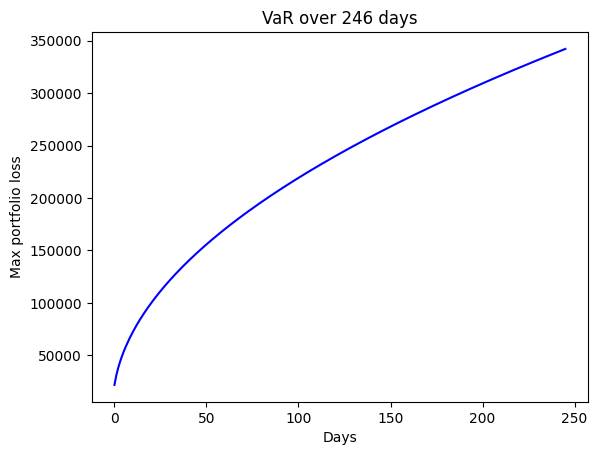

In [39]:
# Calculate n Day VaR
var_array = []
num_days = len(returns)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " VaR (95% confidence): " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Days")
plt.ylabel("Max portfolio loss")
plt.title("VaR over "+str(num_days) +" days")
plt.plot(var_array, "b")
